# Homework 4 - Question 2 - Luke Arend

In [155]:
import math
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

The Poisson distribution is commonly used to model neural spike counts:

$p(k) = \frac{µ^k e^{−µ}}{k!}$,

where $k$ is the spike count (over some specified time interval), and $µ$ is the expected number
of spikes over that interval.

# (a)

We would like to know what the Poisson distribution looks like. Set the expected number
of spikes to $µ$ = 6 spikes/interval then create a vector $p$ of length 21, whose elements
contain the probabilities of Poisson spike counts for $k = [0...20]$. Since we’re clipping the
range at a maximum value of 20, you’ll need to normalize the vector so it sums to one
(the distribution given above is normalized over the range from 0 to infinity) to make
the vector $p$ represent a valid probability distribution.

In [261]:
mu = 6 # spikes/interval
p = np.zeros(21)
for k in range(21):
    p[k] = mu ** k * np.exp(-mu) / math.factorial(k)
p /= np.sum(p) # normalize
np.sum(p)

1.0000000000000002

Plot $p$ in a bar plot and mark the mean firing rate. Is it equal to $µ$? Why or why not?

Text(0.5, 0, 'Spike count')

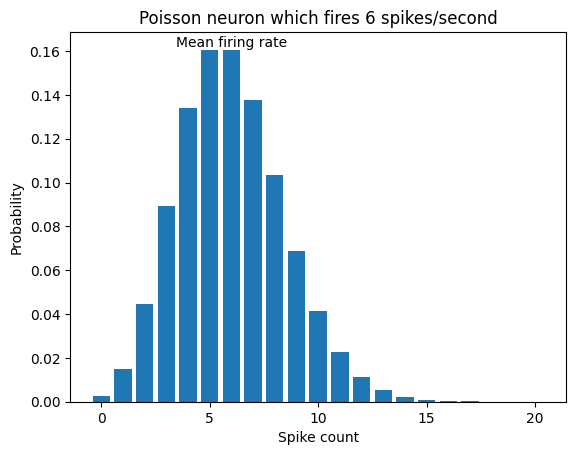

In [200]:
mean_p = p @ np.arange(21)
plt.bar(np.arange(len(p)), p)
plt.text(mean_p, max(p), "Mean firing rate", ha='center', va='bottom')
plt.title('Poisson neuron which fires 6 spikes/second')
plt.ylabel('Probability')
plt.xlabel('Spike count')

In [199]:
np.allclose(mu, mean_p)
mean_p

5.999977649595796

$\mu$ and the mean firing rate measured from the PDF are both equal to 6. We defined $\mu$ as the expected number of spikes per unit interval. In the limit of many unit intervals, on average we observe $\mu$ spikes each time. $\mu$ is equal to the mean firing rate by definition.

# (b)

Generate samples from the Poisson distribution where each sample represents the number
of spikes and ranges from 0 to 20. To simplify the problem, use a clipped Poisson
vector $p$ to write a function `samples = randp(p, num)` that generates num samples
from the probability distribution function (PDF) specified by $p$. [Hint: use the `rand`
function, which generates real values over the interval $[0...1]$, and partition this interval
into portions proportional in size to the probabilities in $p$].

In [145]:
def randp(p, num):
    cdf = np.cumsum(p)
    randnums = np.random.rand(num)
    samples = [np.sum(cdf < x) for x in randnums]
    return np.array(samples)

Test your function by drawing
1,000 samples from the Poisson distribution in (a), plotting a histogram of how many
times each value is sampled, and comparing this to the frequencies predicted by $p$.

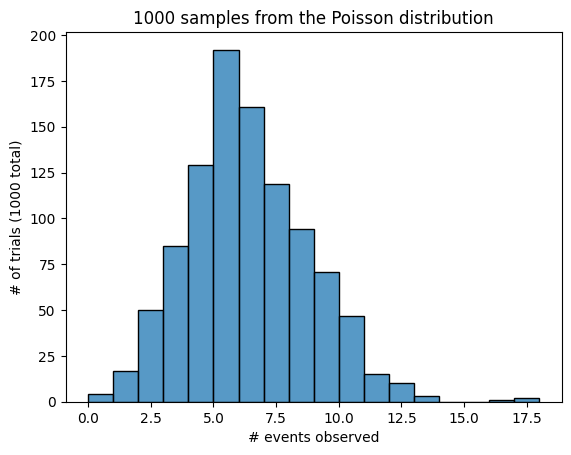

In [189]:
samples = randp(p, 1000)
sns.histplot(samples, binwidth=1)
plt.title('1000 samples from the Poisson distribution')
plt.ylabel('# of trials (1000 total)')
plt.xlabel('# events observed')
plt.show()

Verify qualitatively that the answer gets closer (converges) as you increase the number
of samples (try 10 raised to powers $[2, 3, 4, 5]$).

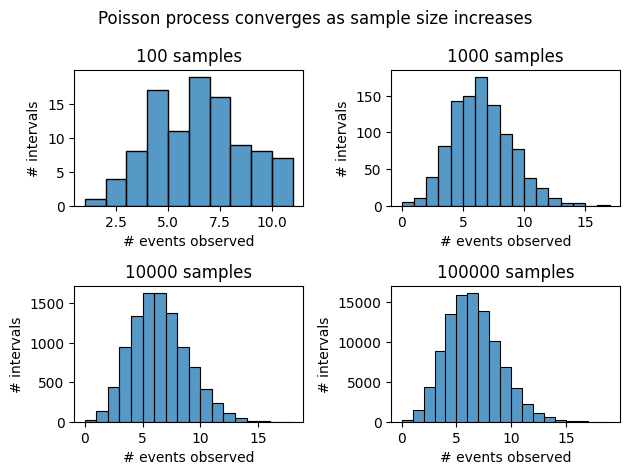

In [190]:
fig, axs = plt.subplots(2, 2)
plt.suptitle('Poisson process converges as sample size increases')
for i, pow in enumerate([2, 3, 4, 5]):
    nsamples = 10 ** pow
    samples = randp(p, nsamples)
    plt.sca(axs.flat[i])
    sns.histplot(samples, binwidth=1)
    plt.title(f'{nsamples} samples')
    plt.ylabel(f'# intervals')
    plt.xlabel('# events observed')
plt.tight_layout()

# (c)

Imagine you’re recording with an electrode from two neurons simultaneously, whose
spikes have very similar waveforms (and thus can’t be distinguished by the spike sorting
software). Create a probability vector, $q$, for the second neuron, assuming a mean rate
of 4 spikes/interval.

In [202]:
def poisson_pdf(n, mu):
    p = np.zeros(n)
    for k in range(n):
        p[k] = mu ** k * np.exp(-mu) / math.factorial(k)
    return p / np.sum(p)

In [234]:
q = poisson_pdf(n=21, mu=4)

What is the probability distribution of the observed spike counts,
which will be the sum of spike counts from the two neurons derived from $p$ and $q$? [Hint:
the output vector should have length $m+n−1$ when $m$ and $n$ are the lengths of the two
input PDFs. This is because the maximum spike count will be bigger than the maximum
of each respective individual neuron.]

A property of Poisson distributions is that a sum of two independent Poisson random variables is also Poisson. In particular, if $X_A$ is Poisson-distributed with mean firing rate $\mu_A$ and $X_B$ is also Poisson with mean firing rate $\mu_B$, then $X_C$ = $X_A + X_B$ is Poisson with mean firing rate $\mu_C = \mu_A + \mu_B$.

In [237]:
mu_a = 6
mu_b = 4
mu_c = mu_a + mu_b
n = len(p) + len(q) - 1
poisson_c = poisson_pdf(n, mu_c)

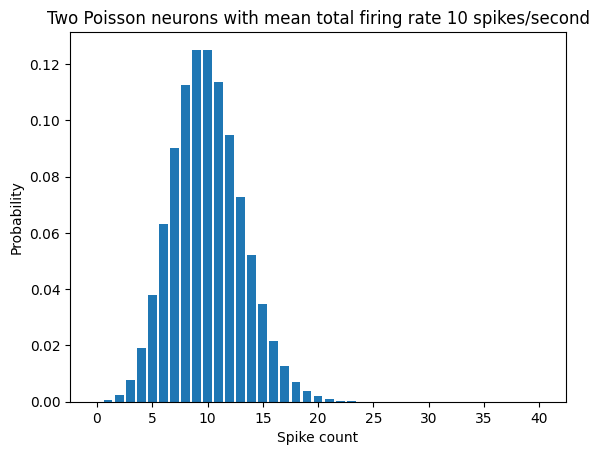

In [238]:
x = np.arange(len(poisson_c))
plt.bar(x, poisson_c)
plt.title('Two Poisson neurons with mean total firing rate 10 spikes/second')
plt.ylabel('Probability')
plt.xlabel('Spike count')
plt.show()

Verify your answer by comparing it to the histogram of 1,000 samples generated by
summing two calls to `randp` (choose a big enough number of samples!).

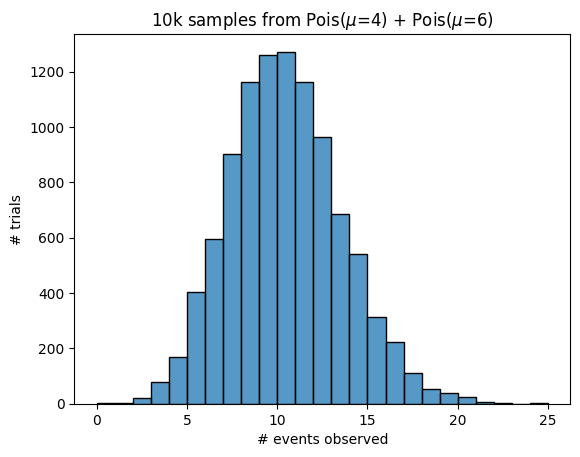

In [259]:
X_a = randp(p, 10000)
X_b = randp(q, 10000)
X_c = X_a + X_b
sns.histplot(X_c, binwidth=1)
plt.title('10k samples from Pois($\mu$=4) + Pois($\mu$=6)')
plt.ylabel('# trials')
plt.xlabel('# events observed')
plt.show()

# (d)

Now imagine you are recording from a neuron with mean rate 10 spikes/interval (the
sum of the rates from the neurons above). Plot the distribution of spike counts for this
neuron, in comparison with the distribution of the sum of the previous two neurons.

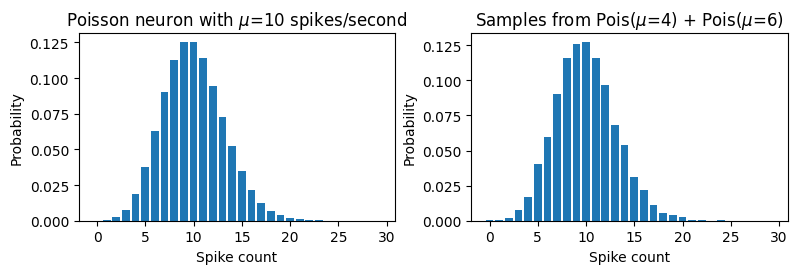

In [260]:
nbins = 30
poisson_c = poisson_pdf(n=nbins, mu=10)
fig, axs = plt.subplots(1, 2, figsize=(8, 3))
plt.suptitle('')
plt.sca(axs[0])
x = np.arange(len(poisson_c))
plt.bar(x, poisson_c)
plt.title('Poisson neuron with $\mu$=10 spikes/second')
plt.ylabel('Probability')
plt.xlabel('Spike count')
plt.sca(axs[1])
x = np.arange(nbins)
y = [np.sum(X_c == i) for i in range(nbins)]
y /= np.sum(y)
plt.bar(x, y)
plt.title('Samples from Pois($\mu$=4) + Pois($\mu$=6)')
plt.ylabel('Probability')
plt.xlabel('Spike count')
plt.tight_layout()

Based on the results of these two experiments, if we record a new spike train, can you
tell whether the spikes you have recorded came from one or two neurons just by looking
at their distribution of spike counts? Comment about the reason why based on the
intuition behind the Poisson distribution.

We **cannot tell whether** we are recording from one or two neurons just by looking at their distribution of spike counts (to the extent the neurons themselves follow a Poisson model). This is because the sum of Poisson distributions is also Poisson with a rate parameter equal to the sum of the two input distributions.